In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


# Spectra of fluorophore-NanoBiTs

In [2]:
def plot_spectra(data_path, x_label, y_label , figsize=(6, 4), normalize = False, save_path = None, color_map = None, ax=None):
    df = pd.read_csv(data_path)
    
    trial_cols = [col for col in df.columns if col.startswith('trial')]
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    if color_map is None:
        palette = sns.color_palette("Set2", n_colors=len(df['sample'].unique()))
        labels_order = df['sample'].unique()
        color_map = dict(zip(labels_order, palette))

    for smbit in df['sample'].unique():
        smbit_data = df[df['sample'] == smbit].copy()

        # Melt trials and compute mean across wavelengths
        melted = smbit_data.melt(id_vars=['wavelength'], value_vars=trial_cols, value_name='intensity')
        grouped = melted.groupby('wavelength')['intensity'].mean().reset_index()

        if normalize:
            grouped['intensity'] = grouped['intensity'] / grouped['intensity'].max()

        color = color_map.get(smbit) 
        ax.plot(grouped['wavelength'], grouped['intensity'], color=color, linewidth=2, label=smbit)

    ax.tick_params(axis='both', labelsize=15)
    
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.legend(frameon=False, fontsize=13)
    
    plt.tight_layout()
    if save_path:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, dpi=600)

    if ax is None:
        plt.show()

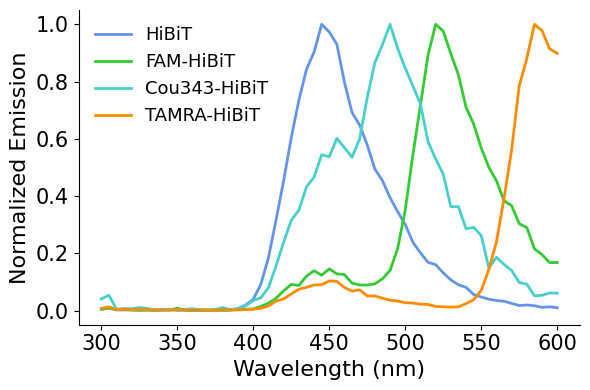

In [3]:
color_map = {
    'HiBiT': 'cornflowerblue',
    'FAM-HiBiT': 'limegreen',
    'Cou343-HiBiT': 'mediumturquoise',
    'TAMRA-HiBiT': 'darkorange'
}

plot_spectra(
    # data_path='../data/spectra_fluor_nanobits.csv',
    data_path='../data/spectra_fluor_nanobits.csv',
    color_map=color_map, 
    normalize=True,
    x_label='Wavelength (nm)',
    y_label='Normalized Emission',
    save_path = '../figure/spectra/spectra_fluor_nanobits_normalized.pdf'
)


# Spectra of TAMTA-linker-NanoBiTs

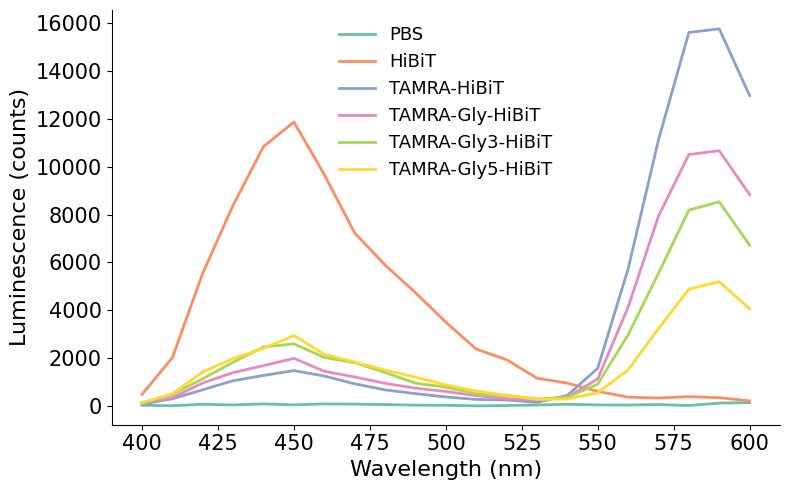

In [4]:
plot_spectra(
    data_path='../data/spectra_fluor_linker_nanobits.csv',
    x_label='Wavelength (nm)',
    y_label='Luminescence (counts)',
    figsize=(8, 5),
    save_path = '../figure/spectra/spectra_fluor_linker_nanobits.pdf'
)


# Spectra of QD-NanoBiTs

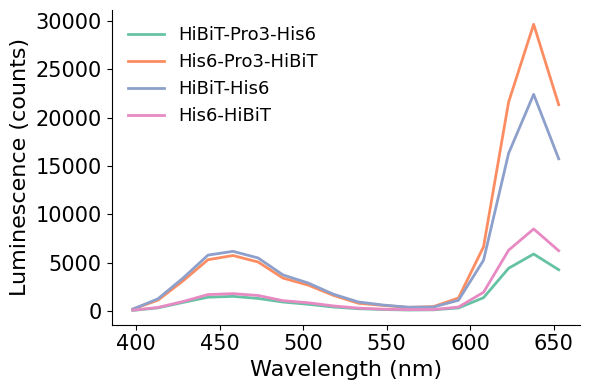

In [5]:
plot_spectra(
    data_path='../data/spectra_quantum_dots_nanobits.csv',
    x_label='Wavelength (nm)',
    y_label='Luminescence (counts)',
    save_path = '../figure/spectra/spectra_quantum_dots_nanobits.pdf'
)